In [66]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

In [4]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [5]:
#This code is taken from previous group project from CPSC572 course. Written by Andrew Turong and Modifeid by Leinard Grande 
# Function Defintions

# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_indegree_dist(G):
    
    degrees = [G.in_degree(n) for n in G.nodes()]
    
    kmin = min(degrees)
    #print("min in degree: ", kmin)
    kmax = max(degrees)
    #print("max in degree: ", kmax)
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=50)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num= 50)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"in degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [6]:
#This code is taken from previous group project from CPSC572 course. Written by Andrew Turong and Modifeid by Leinard Grande
# Function Defintions

# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_outdegree_dist(G):
    
    degrees = [G.out_degree(n) for n in G.nodes()]
    
    kmin = min(degrees)
    #print("min out degree: ", kmin)
    kmax = max(degrees)
    #print("max out degree: ", kmax)
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=50)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=50)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"out degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.legend()

In [20]:
def plotAll(G: nx.Graph, alpha, r):
    indegrees = [G.in_degree(n) for n in G.nodes()]
    outdegrees = [G.out_degree(n) for n in G.nodes()]
    degrees = [G.degree(n) for n in G.nodes()]
    
    kmin = min(min(degrees), min(outdegrees), min(indegrees))
    kmax = max(max(degrees), max(outdegrees), max(indegrees))
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=50)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=50)
    degree, _ = np.histogram(degrees, bins=bin_edges, density=True)
    indegree, _ = np.histogram(indegrees, bins=bin_edges, density=True)
    outdegree, _ = np.histogram(outdegrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    
    
    # Plot power-law fit
    r.power_law.plot_pdf(degrees, linear_bins=True, color='#F79E02', linestyle='--', linewidth=1.5)

    
    plt.loglog(x, degree, marker='o', linestyle='none', color='#1b9e77', label = 'Degree')
    plt.loglog(x, indegree, marker='o', linestyle='none', color='#d95f02', label = 'in-Degree')
    plt.loglog(x, outdegree, marker='o', linestyle='none', color='#7570b3', label = 'out-Degree')
    
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
# Add legend and labels
    plt.legend(labels=['PL($\\alpha$={:.2f})'.format(alpha),'Degree', 'In-degree', 'Out-degree'],  loc ="upper right")
    plt.show()


In [101]:
# read csv file into a pandas dataframe
df = pd.read_csv('edgesUp.csv', index_col=False)

# Filter the dataframe based on year
df_filtered = df[df['year'] > 2019]

# create MultiDiGraph from dataframe
G = nx.from_pandas_edgelist(df_filtered, 'comment_author', 'post_author', edge_attr=True, create_using=nx.MultiDiGraph())


In [2]:
# # convert the graph to a pandas dataframe
# df_filtered.head(3)

In [103]:
print("Total number of Nodes: " , G.number_of_nodes())
print("Total number of Edges: ", G.number_of_edges())

Total number of Nodes:  7150
Total number of Edges:  36379


In [104]:
weighted_G = nx.DiGraph()
weighted_G.add_nodes_from(G.nodes())
        
print(weighted_G)

DiGraph with 7150 nodes and 0 edges


In [122]:
print("Total number of Nodes: ", weighted_G.number_of_nodes())
print("Total number of Edges: ", weighted_G.number_of_edges())


Total number of Nodes:  7150
Total number of Edges:  20781


In [121]:
for u, v, data in G.edges(data=True):
    
    # count number of edges between u and v
    weight = len(G.get_edge_data(u, v))
    print(weight, u, v)
    
    # add edge with weight to new graph
    if weighted_G.has_edge(u, v):
        continue
    else:
        weighted_G.add_edge(u, v, weight=weight)
    
    # handle self-loops
    if u == v:
        weighted_G.add_edge(u, v, weight=weight)
        

1 ynotfoster Sleight-Code
1 ynotfoster negamoonspoon
2 ynotfoster Im-skynet
2 ynotfoster Im-skynet
1 ynotfoster JayStrat
1 ynotfoster 0xca_
1 ynotfoster nickquestionsthings
1 ynotfoster lifeisnotahierarchy
1 ynotfoster wickedascanbe
1 ynotfoster hunkdad
1 ynotfoster Gyraglispe
1 ynotfoster aicessi
1 ynotfoster BluSkies92
1 ynotfoster LeaChan
1 ynotfoster TheRealDebaser
5 ynotfoster snapwired
5 ynotfoster snapwired
5 ynotfoster snapwired
5 ynotfoster snapwired
5 ynotfoster snapwired
1 ynotfoster ZaximusTheGreat
1 ynotfoster Liquidmemer
1 ynotfoster MoonDragonMage
1 ynotfoster iamshamtheman
2 ynotfoster alicianicole2002
2 ynotfoster alicianicole2002
4 ynotfoster Known-Ad2272
4 ynotfoster Known-Ad2272
4 ynotfoster Known-Ad2272
4 ynotfoster Known-Ad2272
1 ynotfoster 6___6___6
1 ynotfoster Ipeteverydogisee
1 ynotfoster RelativeInspector130
1 ynotfoster mozzarella-enthsiast
1 ynotfoster Engineer_No4915
1 ynotfoster Emptythoughtwanderer
2 ynotfoster HomelessAndTired
2 ynotfoster HomelessAndTi

24 tuggyforme tuggyforme
24 tuggyforme tuggyforme
24 tuggyforme tuggyforme
24 tuggyforme tuggyforme
24 tuggyforme tuggyforme
24 tuggyforme tuggyforme
24 tuggyforme tuggyforme
24 tuggyforme tuggyforme
24 tuggyforme tuggyforme
24 tuggyforme tuggyforme
24 tuggyforme tuggyforme
24 tuggyforme tuggyforme
2 tuggyforme 0xca_
2 tuggyforme 0xca_
1 tuggyforme divine-feminine1998
2 tuggyforme Pure-Push7118
2 tuggyforme Pure-Push7118
1 tuggyforme Kawksz
2 tuggyforme Gyraglispe
2 tuggyforme Gyraglispe
1 Head-Lab8876 Morbid_Ways_To_Die
1 Head-Lab8876 poet_redkiss
3 Head-Lab8876 veryberryblue
3 Head-Lab8876 veryberryblue
3 Head-Lab8876 veryberryblue
1 Head-Lab8876 Ouija429
1 Head-Lab8876 Quiet_Grapefruit_926
1 Head-Lab8876 arealpandabear
1 Head-Lab8876 Potential-Quote-5573
1 Head-Lab8876 Head-Lab8876
1 Head-Lab8876 anono_mr
1 BatchmakerJ Morbid_Ways_To_Die
1 BatchmakerJ Rachel_Silver
2 BatchmakerJ Im-skynet
2 BatchmakerJ Im-skynet
1 BatchmakerJ RabidusRex
1 BatchmakerJ rustydoggg
1 BatchmakerJ Equival

4 SugarHooves 4816throwaway
4 SugarHooves 4816throwaway
4 SugarHooves 4816throwaway
4 SugarHooves 4816throwaway
1 SugarHooves too-two-to
1 SugarHooves Expensive_Rub_4332
1 SugarHooves Charleswmcc
1 SugarHooves dogfatherxtech
2 SugarHooves jeremyfisha
2 SugarHooves jeremyfisha
1 StopSlouchingPlease ZoDAxa66
1 StopSlouchingPlease Turkey49
1 StopSlouchingPlease Im-skynet
1 StopSlouchingPlease Knothisguy_again
1 StopSlouchingPlease logancrackdown
1 StopSlouchingPlease ivanray8
5 StopSlouchingPlease Suspicious_Sound_854
5 StopSlouchingPlease Suspicious_Sound_854
5 StopSlouchingPlease Suspicious_Sound_854
5 StopSlouchingPlease Suspicious_Sound_854
5 StopSlouchingPlease Suspicious_Sound_854
1 StopSlouchingPlease Lazy-Branch-2571
1 StopSlouchingPlease veryberryblue
4 See_ad_8768 ZoDAxa66
4 See_ad_8768 ZoDAxa66
4 See_ad_8768 ZoDAxa66
4 See_ad_8768 ZoDAxa66
1 See_ad_8768 Im-skynet
1 See_ad_8768 tuggyforme
3 See_ad_8768 survivalmany
3 See_ad_8768 survivalmany
3 See_ad_8768 survivalmany
3 See_ad_8

4 bongart Kagedeah
4 bongart Kagedeah
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
21 bongart Savonarola1452
1 bongart Antique_Radish8823
1 bongart Sirensong_6842
1 bongart needtheword
3 bongart Balls2374
3 bongart Balls2374
3 bongart Balls2374
1 bongart RomeosBlueStar
1 bongart SubPrincess2004
2 bongart UndisturbedMountain
2 bongart UndisturbedMountain
4 bongart nip_pickles
4 bongart nip_pickles
4 bongart nip_pickles
4 bongart nip_pickles
1 bongart According_Fox_2460
6 bongart exgalactic
6 bongart exgalactic
6 bongart 

2 Holiday_Ad_5653 UncIeRemus
1 Holiday_Ad_5653 Minimum-Historian-66
1 Holiday_Ad_5653 Hot-Loss-8171
1 Holiday_Ad_5653 Valuable_Head_9215
1 Holiday_Ad_5653 Entire_Comfort5029
1 Holiday_Ad_5653 RelativeInspector130
5 Holiday_Ad_5653 S1L1C0NSCR0LLS
5 Holiday_Ad_5653 S1L1C0NSCR0LLS
5 Holiday_Ad_5653 S1L1C0NSCR0LLS
5 Holiday_Ad_5653 S1L1C0NSCR0LLS
5 Holiday_Ad_5653 S1L1C0NSCR0LLS
2 Holiday_Ad_5653 ggglllhhhfff
2 Holiday_Ad_5653 ggglllhhhfff
1 Holiday_Ad_5653 Grade_Rare
1 Holiday_Ad_5653 Electrical_Care8132
6 Holiday_Ad_5653 Mikeymike4
6 Holiday_Ad_5653 Mikeymike4
6 Holiday_Ad_5653 Mikeymike4
6 Holiday_Ad_5653 Mikeymike4
6 Holiday_Ad_5653 Mikeymike4
6 Holiday_Ad_5653 Mikeymike4
1 Holiday_Ad_5653 NotMyslfNEMore
1 Holiday_Ad_5653 Roah_Boat
1 Holiday_Ad_5653 New-Tea-2355
1 Holiday_Ad_5653 Luck-Spell
2 Holiday_Ad_5653 TheREALFlyDog
2 Holiday_Ad_5653 TheREALFlyDog
1 Holiday_Ad_5653 Melika808
1 Holiday_Ad_5653 Ok-Chemistry5887
1 Holiday_Ad_5653 CallMeMrNeon
1 Holiday_Ad_5653 Madame_President_
1 Ho

4 Antique_Radish8823 veryberryblue
4 Antique_Radish8823 veryberryblue
4 Antique_Radish8823 veryberryblue
4 Antique_Radish8823 veryberryblue
1 Antique_Radish8823 Gollumborn
1 Antique_Radish8823 Moonlight_Melody123
1 Antique_Radish8823 TheRealDebaser
1 Antique_Radish8823 TheGreatBeardo052502
2 Antique_Radish8823 Snitching_4rm_rome
2 Antique_Radish8823 Snitching_4rm_rome
1 Antique_Radish8823 AwkwardResist2037
2 Antique_Radish8823 CaliCloudburst
2 Antique_Radish8823 CaliCloudburst
1 Antique_Radish8823 Visual-Cream2734
1 Antique_Radish8823 Shot_Elevator_992
1 Antique_Radish8823 Entrepreneur-Deep
1 Antique_Radish8823 octocrazy
3 Antique_Radish8823 Adventurous_Air2867
3 Antique_Radish8823 Adventurous_Air2867
3 Antique_Radish8823 Adventurous_Air2867
1 Antique_Radish8823 speedwaysghost
1 Antique_Radish8823 MillenialMatriarch
1 Antique_Radish8823 Faketrees2223
1 Antique_Radish8823 beokie
1 Antique_Radish8823 Dangerous_Ad_8909
2 Antique_Radish8823 Known-Ad2272
2 Antique_Radish8823 Known-Ad2272
1 

1 Tzipity BrinxJob
1 Tzipity Equivalent-Earth9921
1 Tzipity Puzzleheaded-Type298
1 Tzipity Peanutbutternjelly_
1 Tzipity wickedascanbe
3 Tzipity poet_redkiss
3 Tzipity poet_redkiss
3 Tzipity poet_redkiss
2 Tzipity CommitteeAlarming795
2 Tzipity CommitteeAlarming795
4 Tzipity logancrackdown
4 Tzipity logancrackdown
4 Tzipity logancrackdown
4 Tzipity logancrackdown
1 Tzipity alredy_takn
2 Tzipity masterchris
2 Tzipity masterchris
3 Tzipity Tiffany_Harlowe
3 Tzipity Tiffany_Harlowe
3 Tzipity Tiffany_Harlowe
2 Tzipity Guide2
2 Tzipity Guide2
1 Tzipity Electrical_Care8132
4 Tzipity 4dailyuseonly
4 Tzipity 4dailyuseonly
4 Tzipity 4dailyuseonly
4 Tzipity 4dailyuseonly
1 Bare425 Im-skynet
1 Livid-Rutabaga Im-skynet
1 Livid-Rutabaga SnooDoggos6382
1 Livid-Rutabaga Divine623
1 Livid-Rutabaga Lazy-Branch-2571
1 Livid-Rutabaga Long-Translator1602
1 Livid-Rutabaga GoodNaturedSimpleton
1 Livid-Rutabaga femme2themme
1 Livid-Rutabaga karsare
1 Livid-Rutabaga odd_toma
1 Livid-Rutabaga Main-Move9692
1 L

1 Grassyhobo homelesspoker1
1 Grassyhobo guts4444
1 Grassyhobo dogfatherxtech
1 Grassyhobo Shot-Temperature5629
2 Grassyhobo meetmeinstjudy
2 Grassyhobo meetmeinstjudy
1 Grassyhobo BYE2LIFE
5 Grassyhobo Pretend-Gap5928
5 Grassyhobo Pretend-Gap5928
5 Grassyhobo Pretend-Gap5928
5 Grassyhobo Pretend-Gap5928
5 Grassyhobo Pretend-Gap5928
1 Grassyhobo Asleep-Abalone3555
1 Grassyhobo Happily_depressedd
3 Desperate-Sector-772 veryberryblue
3 Desperate-Sector-772 veryberryblue
3 Desperate-Sector-772 veryberryblue
1 Desperate-Sector-772 Expensive_Rub_4332
2 Desperate-Sector-772 Agreeable_Roll1150
2 Desperate-Sector-772 Agreeable_Roll1150
1 Desperate-Sector-772 Entire_Resolution_36
2 Desperate-Sector-772 Less_Preparation_428
2 Desperate-Sector-772 Less_Preparation_428
2 Desperate-Sector-772 iamshamtheman
2 Desperate-Sector-772 iamshamtheman
1 Desperate-Sector-772 Potential_Chicken_70
1 Desperate-Sector-772 ExistingPie2
2 Desperate-Sector-772 Charleswmcc
2 Desperate-Sector-772 Charleswmcc
1 Desper

13 schuma73 tuggyforme
13 schuma73 tuggyforme
13 schuma73 tuggyforme
13 schuma73 tuggyforme
13 schuma73 tuggyforme
13 schuma73 tuggyforme
13 schuma73 tuggyforme
13 schuma73 tuggyforme
13 schuma73 tuggyforme
1 schuma73 Ok_Ad_7966
1 schuma73 roamingandy
2 schuma73 PaleRequirement79
2 schuma73 PaleRequirement79
1 schuma73 robusn
1 schuma73 Equivalent-Earth9921
1 schuma73 Useful_Lawyer_3102
1 schuma73 HomelessOnReddit
1 schuma73 Melika808
1 Amusingly_Confused ZoDAxa66
1 Amusingly_Confused DJnoJams
2 Amusingly_Confused No_Consider
2 Amusingly_Confused No_Consider
7 Amusingly_Confused Mikhael_G
7 Amusingly_Confused Mikhael_G
7 Amusingly_Confused Mikhael_G
7 Amusingly_Confused Mikhael_G
7 Amusingly_Confused Mikhael_G
7 Amusingly_Confused Mikhael_G
7 Amusingly_Confused Mikhael_G
1 Amusingly_Confused GoodNaturedSimpleton
1 Amusingly_Confused UnmarkedSpace
1 Amusingly_Confused nikthebeatnik1
1 Amusingly_Confused UndisturbedMountain
1 Rodeocowboy123abc ZoDAxa66
1 Rodeocowboy123abc Agreeable_Roll1

335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iamshamtheman iamshamtheman
335 iams

2 INFOborg Divine623
2 INFOborg Divine623
1 INFOborg kiraikisu
3 INFOborg SlasherBandit
3 INFOborg SlasherBandit
3 INFOborg SlasherBandit
1 INFOborg Odd-Credit1974
1 INFOborg AmAMuslimMan
1 INFOborg veryberryblue
1 INFOborg Secure_West1643
15 INFOborg RabidusRex
15 INFOborg RabidusRex
15 INFOborg RabidusRex
15 INFOborg RabidusRex
15 INFOborg RabidusRex
15 INFOborg RabidusRex
15 INFOborg RabidusRex
15 INFOborg RabidusRex
15 INFOborg RabidusRex
15 INFOborg RabidusRex
15 INFOborg RabidusRex
15 INFOborg RabidusRex
15 INFOborg RabidusRex
15 INFOborg RabidusRex
15 INFOborg RabidusRex
1 INFOborg Shoddy-Donut-9339
1 INFOborg No_Consider
1 INFOborg anono_mr
2 INFOborg BluSkies92
2 INFOborg BluSkies92
1 INFOborg InfiniteClient4631
1 INFOborg Ill_Impress_1570
1 INFOborg Savonarola1452
2 INFOborg UrbanAbsconder
2 INFOborg UrbanAbsconder
1 INFOborg AcanthaceaeOwn5162
2 INFOborg fuiv
2 INFOborg fuiv
3 INFOborg ArtLadyCat
3 INFOborg ArtLadyCat
3 INFOborg ArtLadyCat
1 Legitimate-Plantain2 Oliolioo
1 L

1 agjrpsl tia808
1 agjrpsl toolatetobeoriginal
1 agjrpsl Adrasdea
1 agjrpsl Grassyhobo
1 agjrpsl darkmoon1000
1 ReallyDumbRedditor Fine_Security_1772
1 WRXforsale Fine_Security_1772
1 WRXforsale poet_redkiss
2 WRXforsale veryberryblue
2 WRXforsale veryberryblue
1 WRXforsale cupcakiee
1 WRXforsale ZaximusTheGreat
1 WRXforsale WRXforsale
2 SAGNUTZ Fine_Security_1772
2 SAGNUTZ Fine_Security_1772
1 BreweryStoner Fine_Security_1772
1 BreweryStoner Party_Pomegranate373
1 TropicalKing Fine_Security_1772
1 TropicalKing Character_Radio_7978
1 TropicalKing MrArmenian
1 TropicalKing TheGreatBeardo052502
1 TropicalKing joshe423TN
1 TropicalKing fack_my_life
1 TropicalKing commercialssuck1991
1 TropicalKing willwack0703
1 TropicalKing amoutzou
4 spamcentral Fine_Security_1772
4 spamcentral Fine_Security_1772
4 spamcentral Fine_Security_1772
4 spamcentral Fine_Security_1772
1 spamcentral Lost-Education7318
1 spamcentral GoodNaturedSimpleton
1 spamcentral zacxer
1 spamcentral TheDarkSingularity
1 spa

67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
67 Liquidmemer Liquidmemer
1 Liquidmemer johndoe_detroit
1 Liquidmemer rainplanetstardust
1 Liquidmemer Vagabond2805
1 Liquidmemer Raven-Would
1 Liquidmemer AnyNecessary6588
1 Liquidmemer new_minimalist1
1 Liquidmemer Obeone616
2 Liquidmemer Cstud_69
2 Liquidmemer Cstud_69
1 Liquidmemer Bitchladder
1 Liquidmemer sloppo-jaloppo
1 Liquidmemer vador2244
1 Liquidmemer MoonDragonMa

2 kaosmoker Suspicious_Sound_854
2 kaosmoker Suspicious_Sound_854
5 kaosmoker Savonarola1452
5 kaosmoker Savonarola1452
5 kaosmoker Savonarola1452
5 kaosmoker Savonarola1452
5 kaosmoker Savonarola1452
1 kaosmoker magellan1522
8 kaosmoker veryberryblue
8 kaosmoker veryberryblue
8 kaosmoker veryberryblue
8 kaosmoker veryberryblue
8 kaosmoker veryberryblue
8 kaosmoker veryberryblue
8 kaosmoker veryberryblue
8 kaosmoker veryberryblue
1 kaosmoker abyssal_dreams
1 kaosmoker Glowingup2022
5 kaosmoker Secure_West1643
5 kaosmoker Secure_West1643
5 kaosmoker Secure_West1643
5 kaosmoker Secure_West1643
5 kaosmoker Secure_West1643
1 kaosmoker 1000andonenites
1 kaosmoker The-Literalist
2 kaosmoker burnthegov69
2 kaosmoker burnthegov69
2 kaosmoker willwack0703
2 kaosmoker willwack0703
1 kaosmoker Mrcc25
2 kaosmoker MrArmenian
2 kaosmoker MrArmenian
2 kaosmoker DarthFrancis9
2 kaosmoker DarthFrancis9
3 kaosmoker kaosmoker
3 kaosmoker kaosmoker
3 kaosmoker kaosmoker
4 kaosmoker YoungBuckB0ss
4 kaosmok

2 MrArmenian iamshamtheman
2 MrArmenian Obeone616
2 MrArmenian Obeone616
1 MrArmenian sweetmarmalade02
1 MrArmenian Short_Mexican773
2 MrArmenian bubonis
2 MrArmenian bubonis
1 MrArmenian whothewhattheheckwhy
1 MrArmenian travellady22
2 MrArmenian TemporaryInsect
2 MrArmenian TemporaryInsect
1 MrArmenian earthlyanais
1 MrArmenian germanbini
1 MrArmenian Connect-Pineapple470
2 MrArmenian RegulatoryCapturedMe
2 MrArmenian RegulatoryCapturedMe
1 MrArmenian Vast-Refrigerator-43
1 MrArmenian mindblownholyshet
1 MrArmenian n3vjywrp
2 MrArmenian Liquidmemer
2 MrArmenian Liquidmemer
1 MrArmenian xyz7289
1 MrArmenian YoungBuckB0ss
2 MrArmenian HomelessOnReddit
2 MrArmenian HomelessOnReddit
1 MrArmenian hannahpenns
1 MrArmenian bonkersgirl
3 MrArmenian Big_OG_Homeless
3 MrArmenian Big_OG_Homeless
3 MrArmenian Big_OG_Homeless
1 MrArmenian jusmithfkme
1 MrArmenian tye_died
1 MrArmenian Hardboiledeggbuttys
1 MrArmenian EmeraldCoastTrainer
1 MrArmenian vador2244
1 MrArmenian Plagman39339
1 unwilling

2 Cygnus117 Party_Pomegranate373
1 Cygnus117 No-Dog-8326
12 Cygnus117 Valuable_Head_9215
12 Cygnus117 Valuable_Head_9215
12 Cygnus117 Valuable_Head_9215
12 Cygnus117 Valuable_Head_9215
12 Cygnus117 Valuable_Head_9215
12 Cygnus117 Valuable_Head_9215
12 Cygnus117 Valuable_Head_9215
12 Cygnus117 Valuable_Head_9215
12 Cygnus117 Valuable_Head_9215
12 Cygnus117 Valuable_Head_9215
12 Cygnus117 Valuable_Head_9215
12 Cygnus117 Valuable_Head_9215
3 Cygnus117 Jacke_69
3 Cygnus117 Jacke_69
3 Cygnus117 Jacke_69
1 Cygnus117 charliensue
1 BreathOfPepperAir LeaChan
1 BreathOfPepperAir KatieAdams2020
1 vetcabin LeaChan
1 askXmeXaboutX2006-7 LeaChan
1 ribbitfrog LeaChan
2 SlasherBandit SlasherBandit
2 SlasherBandit SlasherBandit
1 gapingembodiment Select-Battle5083
1 Spirit-Bomb8973 Select-Battle5083
13 clad_in_wools clad_in_wools
13 clad_in_wools clad_in_wools
13 clad_in_wools clad_in_wools
13 clad_in_wools clad_in_wools
13 clad_in_wools clad_in_wools
13 clad_in_wools clad_in_wools
13 clad_in_wools cla

5 createanewaccountuse JessieDaMess
5 createanewaccountuse JessieDaMess
1 createanewaccountuse gthaatar
1 createanewaccountuse susanapics
1 createanewaccountuse KurdNat
1 createanewaccountuse Blah81
1 createanewaccountuse sarahyme
2 createanewaccountuse hannahpenns
2 createanewaccountuse hannahpenns
2 createanewaccountuse narcissistnobueno
2 createanewaccountuse narcissistnobueno
1 createanewaccountuse Rudi24401
1 createanewaccountuse Beastbloblade_
1 createanewaccountuse Plagman39339
2 createanewaccountuse DJ44x
2 createanewaccountuse DJ44x
1 createanewaccountuse dub_cat
1 createanewaccountuse GoodTeaching1
1 createanewaccountuse Vyzantinist
1 createanewaccountuse NovaVix
1 cursedblackdude createanewaccountuse
1 ivysmorgue createanewaccountuse
1 Ok_Cartographer_4105 UrbanAbsconder
1 Frostbite76 UrbanAbsconder
1 Honest_Tie_1980 UrbanAbsconder
1 JaCk3DnUp UrbanAbsconder
3 JaCk3DnUp veryberryblue
3 JaCk3DnUp veryberryblue
3 JaCk3DnUp veryberryblue
1 JaCk3DnUp TaintTouchin
2 JaCk3DnUp rev

2 StinkiForeskinBoi Hopel3ssandsad
2 StinkiForeskinBoi Hopel3ssandsad
1 StinkiForeskinBoi BadlyDrawnGrrl
1 StinkiForeskinBoi hannahpenns
1 StinkiForeskinBoi No_Plastic_2892
1 StinkiForeskinBoi comradecohen
1 StinkiForeskinBoi SnooOwls3872
5 StinkiForeskinBoi mondomongo123
5 StinkiForeskinBoi mondomongo123
5 StinkiForeskinBoi mondomongo123
5 StinkiForeskinBoi mondomongo123
5 StinkiForeskinBoi mondomongo123
1 StinkiForeskinBoi tuff_gong
1 StinkiForeskinBoi ubonmakir
1 StinkiForeskinBoi PrimaryReporter2021
1 StinkiForeskinBoi divestfromfossilfuel
5 StinkiForeskinBoi HomelessOnReddit
5 StinkiForeskinBoi HomelessOnReddit
5 StinkiForeskinBoi HomelessOnReddit
5 StinkiForeskinBoi HomelessOnReddit
5 StinkiForeskinBoi HomelessOnReddit
1 StinkiForeskinBoi International-Song22
2 StinkiForeskinBoi danielmuras
2 StinkiForeskinBoi danielmuras
1 StinkiForeskinBoi YoungBuckB0ss
1 StinkiForeskinBoi ResidentGrape9517
5 StinkiForeskinBoi camdyams
5 StinkiForeskinBoi camdyams
5 StinkiForeskinBoi camdyams
5

2 lilbundle purplapplesauce
2 lilbundle purplapplesauce
2 lilbundle Liquidmemer
2 lilbundle Liquidmemer
1 dana19671969 KatieAdams2020
1 dana19671969 Gyraglispe
1 losandreas36 KatieAdams2020
3 losandreas36 iamhuman3
3 losandreas36 iamhuman3
3 losandreas36 iamhuman3
2 losandreas36 Liquidmemer
2 losandreas36 Liquidmemer
1 losandreas36 iamshamtheman
2 Kancho_Ninja iamhuman3
2 Kancho_Ninja iamhuman3
2 Kancho_Ninja darkmoon1000
2 Kancho_Ninja darkmoon1000
2 Kancho_Ninja Homelessmob
2 Kancho_Ninja Homelessmob
3 Kancho_Ninja DiscreteArcherOfTill
3 Kancho_Ninja DiscreteArcherOfTill
3 Kancho_Ninja DiscreteArcherOfTill
2 Kancho_Ninja whale_lover
2 Kancho_Ninja whale_lover
2 Kancho_Ninja I_CAPE_RUNTS
2 Kancho_Ninja I_CAPE_RUNTS
2 Kancho_Ninja Rabiddd
2 Kancho_Ninja Rabiddd
1 Kancho_Ninja toadshoes
1 Kancho_Ninja thirdlazyeye
1 Kancho_Ninja narcissistnobueno
2 Kancho_Ninja HomelessOnReddit
2 Kancho_Ninja HomelessOnReddit
1 Kancho_Ninja zellfaze_new
2 at447s speedwaysghost
2 at447s speedwaysghost
1 

1 Hot_Computer8067 FrugalLuxuryKitten
1 Hot_Computer8067 Safe_Asparagus3532
1 Hot_Computer8067 lawschoolmeanderings
1 Hot_Computer8067 Zemaia
3 Hot_Computer8067 ttrroobbeerrrtttss
3 Hot_Computer8067 ttrroobbeerrrtttss
3 Hot_Computer8067 ttrroobbeerrrtttss
2 Hot_Computer8067 burnthegov69
2 Hot_Computer8067 burnthegov69
1 Spirited-Scale1871 FrugalLuxuryKitten
1 Spirited-Scale1871 pr1ncesspeaxh
2 Spirited-Scale1871 Clobhairchaun
2 Spirited-Scale1871 Clobhairchaun
1 Spirited-Scale1871 Minimum-Historian-66
2 Spirited-Scale1871 Putrid-Flamingo8692
2 Spirited-Scale1871 Putrid-Flamingo8692
2 Spirited-Scale1871 6___6___6
2 Spirited-Scale1871 6___6___6
2 Hornet-Full Ozzy714m
2 Hornet-Full Ozzy714m
1 Ozzy714m Known-Ad2272
2 Ozzy714m veryberryblue
2 Ozzy714m veryberryblue
1 Ozzy714m Ki1lm3pl34s3
1 Ozzy714m Ozzy714m
1 LeadershipEastern271 alicianicole2002
1 AggravatingJicama243 LeadershipEastern271
1 AggravatingJicama243 SubPrincess2004
1 AggravatingJicama243 Paczilla2
5 alicianicole2002 alicianico

1 NightstopYorkRegion Method_Key
1 Doogerie Rabiddd
1 aliasshackelford1986 Rabiddd
3 1000andonenites 1000andonenites
3 1000andonenites 1000andonenites
3 1000andonenites 1000andonenites
1 thots_n_prayers Great_Profit_9770
1 MrPianoMan88 Great_Profit_9770
1 One_Watercress413 One_Watercress413
1 tarptraptent One_Watercress413
3 tarptraptent veryberryblue
3 tarptraptent veryberryblue
3 tarptraptent veryberryblue
1 tarptraptent NihongoNerd
7 tarptraptent iamshamtheman
7 tarptraptent iamshamtheman
7 tarptraptent iamshamtheman
7 tarptraptent iamshamtheman
7 tarptraptent iamshamtheman
7 tarptraptent iamshamtheman
7 tarptraptent iamshamtheman
17 tarptraptent tarptraptent
17 tarptraptent tarptraptent
17 tarptraptent tarptraptent
17 tarptraptent tarptraptent
17 tarptraptent tarptraptent
17 tarptraptent tarptraptent
17 tarptraptent tarptraptent
17 tarptraptent tarptraptent
17 tarptraptent tarptraptent
17 tarptraptent tarptraptent
17 tarptraptent tarptraptent
17 tarptraptent tarptraptent
17 tarptra

1 Bearfoot42 hannahpenns
1 Bearfoot42 veryberryblue
1 KingOfKvsh Emmanuel_t2003
6 KingOfKvsh veryberryblue
6 KingOfKvsh veryberryblue
6 KingOfKvsh veryberryblue
6 KingOfKvsh veryberryblue
6 KingOfKvsh veryberryblue
6 KingOfKvsh veryberryblue
9 KingOfKvsh KingOfKvsh
9 KingOfKvsh KingOfKvsh
9 KingOfKvsh KingOfKvsh
9 KingOfKvsh KingOfKvsh
9 KingOfKvsh KingOfKvsh
9 KingOfKvsh KingOfKvsh
9 KingOfKvsh KingOfKvsh
9 KingOfKvsh KingOfKvsh
9 KingOfKvsh KingOfKvsh
2 KingOfKvsh spidert666
2 KingOfKvsh spidert666
8 Valuable_Head_9215 Valuable_Head_9215
8 Valuable_Head_9215 Valuable_Head_9215
8 Valuable_Head_9215 Valuable_Head_9215
8 Valuable_Head_9215 Valuable_Head_9215
8 Valuable_Head_9215 Valuable_Head_9215
8 Valuable_Head_9215 Valuable_Head_9215
8 Valuable_Head_9215 Valuable_Head_9215
8 Valuable_Head_9215 Valuable_Head_9215
1 Bumblebree916 Valuable_Head_9215
1 Fit-Presentation82 Valuable_Head_9215
1 Fit-Presentation82 veryberryblue
1 Fit-Presentation82 seneeb
3 Thebaseside Rabiddd
3 Thebaseside 

1 HoboHeyoka Cstud_69
3 HoboHeyoka iamshamtheman
3 HoboHeyoka iamshamtheman
3 HoboHeyoka iamshamtheman
1 ZauberWeiner new_minimalist1
1 ZauberWeiner chappyandmaya
1 ZauberWeiner ch1253
1 Acrobatic-Tourist688 new_minimalist1
1 Acrobatic-Tourist688 Grade_Rare
2 Acrobatic-Tourist688 iameman9669
2 Acrobatic-Tourist688 iameman9669
1 Acrobatic-Tourist688 HomelessOnReddit
1 Acrobatic-Tourist688 alphanumericusername
1 ieatlotsofvegetables Successful-Career739
1 ieatlotsofvegetables PDXHRC
2 ieatlotsofvegetables kaosmoker
2 ieatlotsofvegetables kaosmoker
2 ieatlotsofvegetables JoeRMD77
2 ieatlotsofvegetables JoeRMD77
1 ieatlotsofvegetables JessieDaMess
1 ieatlotsofvegetables kittenklyn
1 ieatlotsofvegetables narcissistnobueno
3 ieatlotsofvegetables tia808
3 ieatlotsofvegetables tia808
3 ieatlotsofvegetables tia808
2 ieatlotsofvegetables whale_lover
2 ieatlotsofvegetables whale_lover
1 ieatlotsofvegetables iamscaredofmybf
1 ieatlotsofvegetables YoungBuckB0ss
2 ieatlotsofvegetables Captain-Crunch

2 DKNDKN1234 Luck-Spell
2 DKNDKN1234 Luck-Spell
1 DKNDKN1234 doctorTCH
1 kicksr4trids1 Luck-Spell
13 owiesss owiesss
13 owiesss owiesss
13 owiesss owiesss
13 owiesss owiesss
13 owiesss owiesss
13 owiesss owiesss
13 owiesss owiesss
13 owiesss owiesss
13 owiesss owiesss
13 owiesss owiesss
13 owiesss owiesss
13 owiesss owiesss
13 owiesss owiesss
1 Soggy-Account1453 owiesss
1 -Bad_Code- owiesss
3 Tsu_hatori owiesss
3 Tsu_hatori owiesss
3 Tsu_hatori owiesss
1 lovescrap41 Sadishist
1 Dramatic_Guess_8060 Sadishist
2 Dramatic_Guess_8060 jenimafer
2 Dramatic_Guess_8060 jenimafer
3 Dramatic_Guess_8060 Luck-Spell
3 Dramatic_Guess_8060 Luck-Spell
3 Dramatic_Guess_8060 Luck-Spell
3 UHuckleberry Sadishist
3 UHuckleberry Sadishist
3 UHuckleberry Sadishist
5 Stayinthewoods Present_Ad_7177
5 Stayinthewoods Present_Ad_7177
5 Stayinthewoods Present_Ad_7177
5 Stayinthewoods Present_Ad_7177
5 Stayinthewoods Present_Ad_7177
10 Present_Ad_7177 Present_Ad_7177
10 Present_Ad_7177 Present_Ad_7177
10 Present_Ad_

2 JamesOnKeplER666 Pichuboy88
1 JamesOnKeplER666 camdyams
6 JamesOnKeplER666 FeathercockMelee
6 JamesOnKeplER666 FeathercockMelee
6 JamesOnKeplER666 FeathercockMelee
6 JamesOnKeplER666 FeathercockMelee
6 JamesOnKeplER666 FeathercockMelee
6 JamesOnKeplER666 FeathercockMelee
1 JamesOnKeplER666 Oragami
3 JamesOnKeplER666 11cat12
3 JamesOnKeplER666 11cat12
3 JamesOnKeplER666 11cat12
4 ParrotRiley TheREALFlyDog
4 ParrotRiley TheREALFlyDog
4 ParrotRiley TheREALFlyDog
4 ParrotRiley TheREALFlyDog
1 Infamous_Regular1328 TheREALFlyDog
1 lightmach TheREALFlyDog
1 Longjumping-Fix-2483 TheREALFlyDog
1 DrChosen TheREALFlyDog
1 AManHere TheREALFlyDog
1 AManHere DollBabyLG
1 Impressive_Cup6177 TheREALFlyDog
1 DrRadikal coyocat
1 DrRadikal Givemeallyourtacos
2 wdrosa Gl3nnster
2 wdrosa Gl3nnster
1 Gl3nnster Law-Thin
3 Gl3nnster iamshamtheman
3 Gl3nnster iamshamtheman
3 Gl3nnster iamshamtheman
1 Gl3nnster Acrobatic_Yak_1580
1 DontTellPeopleMyName Gl3nnster
2 sunflowerdecay Gl3nnster
2 sunflowerdecay Gl3

1 DoreenMichele 420PDXMatt
1 DoreenMichele tanakaflocka
1 DoreenMichele kaycuk
5 DoreenMichele DJ44x
5 DoreenMichele DJ44x
5 DoreenMichele DJ44x
5 DoreenMichele DJ44x
5 DoreenMichele DJ44x
1 DoreenMichele better_late_than
1 DoreenMichele KeenWizard
1 DoreenMichele Pretend-Gap5928
1 DoreenMichele DoreenMichele
2 DoreenMichele easternringer
2 DoreenMichele easternringer
1 DoreenMichele markjmayhew
1 orangehill981 Limp_Can_9485
4 CrocSearShark Limp_Can_9485
4 CrocSearShark Limp_Can_9485
4 CrocSearShark Limp_Can_9485
4 CrocSearShark Limp_Can_9485
5 ATHABERSTS Limp_Can_9485
5 ATHABERSTS Limp_Can_9485
5 ATHABERSTS Limp_Can_9485
5 ATHABERSTS Limp_Can_9485
5 ATHABERSTS Limp_Can_9485
1 ATHABERSTS hahauhoh2021
1 Vegetable-Reply7858 Limp_Can_9485
4 SirBitcher Limp_Can_9485
4 SirBitcher Limp_Can_9485
4 SirBitcher Limp_Can_9485
4 SirBitcher Limp_Can_9485
1 officegeek Limp_Can_9485
1 Negotiation_Only_ Limp_Can_9485
1 Negotiation_Only_ Cstud_69
2 Negotiation_Only_ TheREALFlyDog
2 Negotiation_Only_ Th

1 Smasher627 iamshamtheman
2 Smasher627 Trey94z
2 Smasher627 Trey94z
1 Smasher627 MrArmenian
1 Smasher627 iamhuman3
1 Smasher627 Theghostofsabotage
3 Hot-Personality-3871 iamshamtheman
3 Hot-Personality-3871 iamshamtheman
3 Hot-Personality-3871 iamshamtheman
1 Jeff-Broadn-62 LogicalFallacy77
1 Mean-Combination-328 LogicalFallacy77
5 Mean-Combination-328 iamshamtheman
5 Mean-Combination-328 iamshamtheman
5 Mean-Combination-328 iamshamtheman
5 Mean-Combination-328 iamshamtheman
5 Mean-Combination-328 iamshamtheman
1 Mean-Combination-328 OkCheck12
1 Mean-Combination-328 HelplessFish
1 Mean-Combination-328 Bitchladder
6 Mean-Combination-328 pmr92
6 Mean-Combination-328 pmr92
6 Mean-Combination-328 pmr92
6 Mean-Combination-328 pmr92
6 Mean-Combination-328 pmr92
6 Mean-Combination-328 pmr92
1 Mean-Combination-328 Empty_Bat_7829
2 Mean-Combination-328 purplapplesauce
2 Mean-Combination-328 purplapplesauce
2 Mean-Combination-328 Vallejotacoz
2 Mean-Combination-328 Vallejotacoz
3 Mean-Combinati

6 antipiracylaws karsare
6 antipiracylaws karsare
6 antipiracylaws karsare
6 antipiracylaws karsare
6 antipiracylaws karsare
3 antipiracylaws stevekimes
3 antipiracylaws stevekimes
3 antipiracylaws stevekimes
1 antipiracylaws Psychological_Pea871
3 antipiracylaws heldoglykke
3 antipiracylaws heldoglykke
3 antipiracylaws heldoglykke
1 antipiracylaws prissysnbyantiques
1 antipiracylaws kiealock
1 antipiracylaws AUTISTICWEREWOLF2
1 MissAnneThrope13 Eugene_Beaver
1 89nlsmith89 Grassyhobo
1 deprimodot Grassyhobo
1 rongy_dringus Kagedeah
1 rongy_dringus Regular-Breadfruit90
1 rongy_dringus KatieAdams2020
1 -CanHazFriend- Kagedeah
6 -CanHazFriend- ninjapantiez
6 -CanHazFriend- ninjapantiez
6 -CanHazFriend- ninjapantiez
6 -CanHazFriend- ninjapantiez
6 -CanHazFriend- ninjapantiez
6 -CanHazFriend- ninjapantiez
1 -CanHazFriend- Liquidmemer
5 zacxer zacxer
5 zacxer zacxer
5 zacxer zacxer
5 zacxer zacxer
5 zacxer zacxer
1 GreyEggsandBacon zacxer
1 WallyPfisterAlready zacxer
2 WallyPfisterAlready Re

3 Express_Staff_1886 commercialssuck1991
3 Express_Staff_1886 commercialssuck1991
3 Express_Staff_1886 jouscat
3 Express_Staff_1886 jouscat
3 Express_Staff_1886 jouscat
1 Express_Staff_1886 stevekimes
1 Express_Staff_1886 Naomi0206
1 Express_Staff_1886 throwaway7290-6328
4 Express_Staff_1886 thirdlazyeye
4 Express_Staff_1886 thirdlazyeye
4 Express_Staff_1886 thirdlazyeye
4 Express_Staff_1886 thirdlazyeye
1 ForeverBanned69 karsare
2 saintpaulms karsare
2 saintpaulms karsare
2 joanneshands karsare
2 joanneshands karsare
1 buffrants karsare
1 buffrants YoungBuckB0ss
1 jackjack_d3mon karsare
2 jackjack_d3mon Jenn_There_Done_That
2 jackjack_d3mon Jenn_There_Done_That
1 GryphusOneACX karsare
1 realtorKen thelink225
4 Odd_Flan_8042 cturtl808
4 Odd_Flan_8042 cturtl808
4 Odd_Flan_8042 cturtl808
4 Odd_Flan_8042 cturtl808
3 Odd_Flan_8042 stevekimes
3 Odd_Flan_8042 stevekimes
3 Odd_Flan_8042 stevekimes
6 Odd_Flan_8042 Liquidmemer
6 Odd_Flan_8042 Liquidmemer
6 Odd_Flan_8042 Liquidmemer
6 Odd_Flan_8

2 aendeyndron Skullylox
1 fuller4740 Clynking96
1 pomegranate7777 Clynking96
1 pomegranate7777 n3vjywrp
1 dontnameit Clynking96
1 dontnameit humbl314159
1 yourproblems Clynking96
1 DoubleD_Dabs Clynking96
1 Aggressive_Term_8864 karsare
1 Johnnyworkshard karsare
1 Johnnyworkshard k-star-dash
1 Johnnyworkshard DJ44x
1 Mcnugz9 karsare
2 wanahelp karsare
2 wanahelp karsare
2 wanahelp Psychological_Pea871
2 wanahelp Psychological_Pea871
1 wanahelp MomNumber2
1 wanahelp Vast-Refrigerator-43
1 wanahelp n3vjywrp
2 wanahelp hannahpenns
2 wanahelp hannahpenns
1 Arc_E karsare
2 Starbent karsare
2 Starbent karsare
1 CutieSushi005 karsare
1 alibad78 karsare
1 GittinGud94 stevekimes
1 OrangeTheDj stevekimes
1 Iwantpancake Savonarola1452
2 deusnap Savonarola1452
2 deusnap Savonarola1452
1 chdvtt Savonarola1452
1 error_userexpired Savonarola1452
1 error_userexpired Useful_Refuse4662
1 Whole_Adeptness_2135 Savonarola1452
4 alycrafticus Savonarola1452
4 alycrafticus Savonarola1452
4 alycrafticus Savonar

2 Bennyteeth1 Psychological_Pea871
1 Bennyteeth1 thirdlazyeye
1 Bennyteeth1 False-Ad222
1 UnREdone Psychological_Pea871
1 Queerdee23 Psychological_Pea871
1 RogueDaMenace Psychological_Pea871
2 FoxWyrd Psychological_Pea871
2 FoxWyrd Psychological_Pea871
1 eternalhobothegreat Psychological_Pea871
1 eternalhobothegreat thirdlazyeye
1 Punkinprincess Psychological_Pea871
1 Punkinprincess obscenesheen
4 CandyKaBBOOMM Psychological_Pea871
4 CandyKaBBOOMM Psychological_Pea871
4 CandyKaBBOOMM Psychological_Pea871
4 CandyKaBBOOMM Psychological_Pea871
2 formybabyryzka Psychological_Pea871
2 formybabyryzka Psychological_Pea871
1 Grendels Liar_tuck
1 Remarkable_Rent_2229 AUTISTICWEREWOLF2
1 crumbegginbaghead AUTISTICWEREWOLF2
5 crumbegginbaghead MrArmenian
5 crumbegginbaghead MrArmenian
5 crumbegginbaghead MrArmenian
5 crumbegginbaghead MrArmenian
5 crumbegginbaghead MrArmenian
1 crumbegginbaghead mindblownholyshet
3 crumbegginbaghead TheJamesPajamas
3 crumbegginbaghead TheJamesPajamas
3 crumbeggin

3 lubbycherriesz obscenesheen
3 lubbycherriesz obscenesheen
1 Major-Macaron obscenesheen
3 nbrown1589 obscenesheen
3 nbrown1589 obscenesheen
3 nbrown1589 obscenesheen
2 nbrown1589 YoungBuckB0ss
2 nbrown1589 YoungBuckB0ss
1 ScRuBlOrD95 obscenesheen
1 julienlangelier obscenesheen
8 Vast-Refrigerator-43 Vast-Refrigerator-43
8 Vast-Refrigerator-43 Vast-Refrigerator-43
8 Vast-Refrigerator-43 Vast-Refrigerator-43
8 Vast-Refrigerator-43 Vast-Refrigerator-43
8 Vast-Refrigerator-43 Vast-Refrigerator-43
8 Vast-Refrigerator-43 Vast-Refrigerator-43
8 Vast-Refrigerator-43 Vast-Refrigerator-43
8 Vast-Refrigerator-43 Vast-Refrigerator-43
1 Ok_Put2138 Vast-Refrigerator-43
1 Ok_Put2138 HomelessOnReddit
1 yourfacesx2resme Vast-Refrigerator-43
1 yourfacesx2resme kittenklyn
1 yourfacesx2resme hannahpenns
1 Luniarty Vast-Refrigerator-43
1 1RedRoseGold Vast-Refrigerator-43
1 1RedRoseGold n3vjywrp
1 mad_tastic Vast-Refrigerator-43
2 femtakei Vast-Refrigerator-43
2 femtakei Vast-Refrigerator-43
1 buffalo_mojo

1 justanotherdays markjmayhew
1 justanotherdays flamewolf393
1 justanotherdays dumpsterdumpling99
14 7LonelySoul7 JessieDaMess
14 7LonelySoul7 JessieDaMess
14 7LonelySoul7 JessieDaMess
14 7LonelySoul7 JessieDaMess
14 7LonelySoul7 JessieDaMess
14 7LonelySoul7 JessieDaMess
14 7LonelySoul7 JessieDaMess
14 7LonelySoul7 JessieDaMess
14 7LonelySoul7 JessieDaMess
14 7LonelySoul7 JessieDaMess
14 7LonelySoul7 JessieDaMess
14 7LonelySoul7 JessieDaMess
14 7LonelySoul7 JessieDaMess
14 7LonelySoul7 JessieDaMess
1 7LonelySoul7 gthaatar
1 7LonelySoul7 PonkKastle
1 7LonelySoul7 HomelessJack
1 7LonelySoul7 narcissistnobueno
1 ConfidenceCareless16 JessieDaMess
3 colbyhowto1 colbyhowto1
3 colbyhowto1 colbyhowto1
3 colbyhowto1 colbyhowto1
1 No_Succotash_1923 colbyhowto1
1 No_Succotash_1923 thrasher_basher69
2 No_Succotash_1923 Comprehensive-Ad2539
2 No_Succotash_1923 Comprehensive-Ad2539
1 No_Succotash_1923 YoungBuckB0ss
1 No_Succotash_1923 ExecutiveAlpaca
1 BahnwaerterThiel colbyhowto1
1 BahnwaerterThiel

5 spritewithnolemon kuttippa
1 panxocakez weeb8745
1 panxocakez camdyams
1 panxocakez humbl314159
1 panxocakez chodewarrior76
1 panxocakez panxocakez
1 explosiveXprojectile weeb8745
1 explosiveXprojectile DJ44x
1 explosiveXprojectile lot-555
4 Simple-Sorbet7416 weeb8745
4 Simple-Sorbet7416 weeb8745
4 Simple-Sorbet7416 weeb8745
4 Simple-Sorbet7416 weeb8745
4 Tawpigh weeb8745
4 Tawpigh weeb8745
4 Tawpigh weeb8745
4 Tawpigh weeb8745
1 Tawpigh bethos30
1 Tawpigh KurdNat
3 Tawpigh Comprehensive-Ad2539
3 Tawpigh Comprehensive-Ad2539
3 Tawpigh Comprehensive-Ad2539
1 Tawpigh camdyams
1 Tawpigh hannahpenns
1 Tawpigh narcissistnobueno
2 Tawpigh flamewolf393
2 Tawpigh flamewolf393
2 Tawpigh vador2244
2 Tawpigh vador2244
1 Tawpigh illegalandIncognito
1 Tawpigh tothehospital
1 Tawpigh E_ock
2 Tawpigh iamhuman3
2 Tawpigh iamhuman3
1 Tawpigh TheCatanist
1 Joyvibe weeb8745
1 Joyvibe narcissistnobueno
1 Joyvibe hannahpenns
1 Fuckyousochard weeb8745
1 xrp_reddit_guy TheElderTrolls3
1 xrp_reddit_guy humb

11 MemeDestroyer465 MemeDestroyer465
11 MemeDestroyer465 MemeDestroyer465
11 MemeDestroyer465 MemeDestroyer465
11 MemeDestroyer465 MemeDestroyer465
11 MemeDestroyer465 MemeDestroyer465
11 MemeDestroyer465 MemeDestroyer465
11 MemeDestroyer465 MemeDestroyer465
11 MemeDestroyer465 MemeDestroyer465
11 MemeDestroyer465 MemeDestroyer465
11 MemeDestroyer465 MemeDestroyer465
11 MemeDestroyer465 MemeDestroyer465
1 MemeDestroyer465 jjco0l
1 RayneXAsh MemeDestroyer465
2 RayneXAsh OneAtPeace
2 RayneXAsh OneAtPeace
1 RayneXAsh MF_VIHCIT
1 RayneXAsh JessieDaMess
1 RayneXAsh RedPandaBeserk
1 RayneXAsh markjmayhew
1 RayneXAsh Psychological_Pea871
1 RayneXAsh PDXHRC
1 RayneXAsh spcmiller
1 RayneXAsh Rudi24401
1 No_Raccoon_9769 MemeDestroyer465
1 No_Raccoon_9769 midnightmonet
1 Captain-Crunch1989 MemeDestroyer465
1 Captain-Crunch1989 Jokqer42
2 Captain-Crunch1989 kryptnight
2 Captain-Crunch1989 kryptnight
1 Captain-Crunch1989 skysview
1 Captain-Crunch1989 OneAtPeace
2 Captain-Crunch1989 igotquestions233

1 BusinessFennel1541 cyco_semantic
1 Namelesschild213 MemeDestroyer465
7 Namelesschild213 Namelesschild213
7 Namelesschild213 Namelesschild213
7 Namelesschild213 Namelesschild213
7 Namelesschild213 Namelesschild213
7 Namelesschild213 Namelesschild213
7 Namelesschild213 Namelesschild213
7 Namelesschild213 Namelesschild213
1 loneranger66613 Plagman39339
1 loneranger66613 hannahpenns
1 loneranger66613 kaycuk
1 Plagman39339 bammab0890
1 Plagman39339 JusticeAvenger618
13 Plagman39339 Plagman39339
13 Plagman39339 Plagman39339
13 Plagman39339 Plagman39339
13 Plagman39339 Plagman39339
13 Plagman39339 Plagman39339
13 Plagman39339 Plagman39339
13 Plagman39339 Plagman39339
13 Plagman39339 Plagman39339
13 Plagman39339 Plagman39339
13 Plagman39339 Plagman39339
13 Plagman39339 Plagman39339
13 Plagman39339 Plagman39339
13 Plagman39339 Plagman39339
1 zeft64 Plagman39339
2 zeft64 regula_size_jess
2 zeft64 regula_size_jess
1 zeft64 choochoo9053
2 brokebacknomountain Plagman39339
2 brokebacknomountain Pl

3 SamGlass Stizinky
3 SamGlass Stizinky
1 Alligatorfur USStatesman
1 ImbeddedElite USStatesman
2 ImbeddedElite Stizinky
2 ImbeddedElite Stizinky
2 just_plain_sam zonination
2 just_plain_sam zonination
1 zonination hotch33to
1 zonination FlyingTerrapin71
2 zonination zonination
2 zonination zonination
1 Juuniechan zonination
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
21 missxjas missxjas
1 malders missxjas
1 warsie Honest_Joseph
1 warsie DJ44x
1 warsie TheHouseOfNews
1 warsie Andalib_Odulate
1 warsie slevin50
4 slevin50 slevin50
4 slevin50 slevin50
4 slevin50 slevin50
4 slevin50 slevin50
1 killerbutterfly22 slevin50


6 better_late_than better_late_than
6 better_late_than better_late_than
6 better_late_than better_late_than
6 better_late_than better_late_than
6 better_late_than better_late_than
1 crosseyedpanda18 better_late_than
1 ScrupyNooples BrokenMoon13
1 RadioactiveCorndog BrokenMoon13
1 RadioactiveCorndog doomer12345
1 RadioactiveCorndog Ricksanchez2278
2 RadioactiveCorndog HomelessInTheNW
2 RadioactiveCorndog HomelessInTheNW
1 _theredplanet_ doomer12345
1 mclinden212 doomer12345
1 Infinityqh doomer12345
1 RealNowhereGirl Ricksanchez2278
4 HierEncore Ricksanchez2278
4 HierEncore Ricksanchez2278
4 HierEncore Ricksanchez2278
4 HierEncore Ricksanchez2278
1 HierEncore HomelessInTheNW
2 ghostmob550 Ricksanchez2278
2 ghostmob550 Ricksanchez2278
1 ThatOneAsswipe HomelessInTheNW
1 ashes1436 HomelessInTheNW
1 New2reddit68 HomelessInTheNW
1 New2reddit68 themedza
1 themedza themedza
1 Shrugbeternowthaneva themedza
1 AbstruseMurmurings themedza
1 AbstruseMurmurings DJ44x
1 VermontKindBud addivinum
12 too

6 Aurea_Sol fack_my_life
6 Aurea_Sol fack_my_life
1 SSG_SSG_BloodMoon dogfatherxtech
1 ijdcw278 dogfatherxtech
1 cheneyk dogfatherxtech
1 743788432 Maleficent-Eagle-518
1 Dr-MTC Maleficent-Eagle-518
1 Cautious-Living6116 veryberryblue
1 Immediate-Complex-76 veryberryblue
1 gozer808 veryberryblue
1 Eggsysmistress Entire_Resolution_36
1 em0528 Entire_Resolution_36
1 anonpotat0 Entire_Resolution_36
1 Floofyland Entire_Resolution_36
1 ExpensiveSecond376 Entire_Resolution_36
1 2randy Resolute_Protection
2 HewoItsMee Difficult_Focus6785
2 HewoItsMee Difficult_Focus6785
2 FangornEnt Difficult_Focus6785
2 FangornEnt Difficult_Focus6785
1 theOG-betterscotch dark_wolf1994
2 BrundleTheFly666 Fun-Apricot-5932
2 BrundleTheFly666 Fun-Apricot-5932
1 jettastar TheChillestPanda
1 Bright_Mechanic_7458 TheChillestPanda
1 Quiet_Document_6060 TheChillestPanda
1 Inside_Raspberry5174 TheChillestPanda
1 Inside_Raspberry5174 GoodNaturedSimpleton
1 Inside_Raspberry5174 purplapplesauce
2 QTFIRE TheChillestPanda


1 ShroomyTheLoner DJ44x
1 hotknightjenna DJ44x
1 Lee-Moses DJ44x
1 RantingHomeless Blacqmath
1 Pale_Fire21 Blacqmath
1 LivingPangolin MyHomelessMeals
1 ur_a_witcher_geralt markjmayhew
1 MiahEver markjmayhew
1 specterofautism lot-555
6 ThatRobRobinson lot-555
6 ThatRobRobinson lot-555
6 ThatRobRobinson lot-555
6 ThatRobRobinson lot-555
6 ThatRobRobinson lot-555
6 ThatRobRobinson lot-555
1 chooseausername7567 lot-555
1 nothing_anyway lot-555
1 rajincajun68 hotch33to
1 DurianExecutioner en_slemmig_torsk
1 HJSlibrarylady WhackyTobaki
1 PatriotGrrrl Mchafee
1 flobbaddobbadob DustinDirt
1 SchruteHarms DustinDirt
1 robleerobleeroblee DustinDirt
1 fuckanthropocentrism BudsNotBullets
1 _meerkats_ BudsNotBullets
1 xxshteviexx ki4clz
1 beetard 123cats-
1 JohnnyWallace14 HomelessJack
1 illycan HomelessJack
1 bevelededges Gretuintro
1 fellowbikepacker Ricksanchez2278
1 tigerstar1 HomelessInTheNW
1 AlvariusMoat HomelessInTheNW
1 buy-more-swords HomelessInTheNW
3 Speedupslowdown themedza
3 Speedupslo

In [123]:
edges = weighted_G.edges(data=True)
edge_list = [(u, v, data['weight']) for u, v, data in edges]

# Create a pandas dataframe from the edge list
df = pd.DataFrame(edge_list, columns=['source', 'target', 'weight'])

# Write the dataframe to a CSV file
df.to_csv('weighted_edges.csv', index=False)

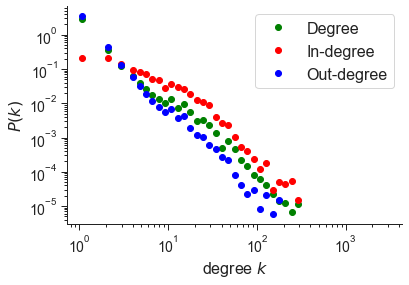

In [128]:
plotAll(weighted_G)

In [145]:
w_NoLoops_G = nx.DiGraph()
w_NoLoops_G.add_nodes_from(G.nodes())
        
print(w_NoLoops_G)

for u, v, data in weighted_G.edges(data=True):
        if u == v:
            print(u, v)
            continue
        else:
            w_NoLoops_G.add_edge(u, v, weight=weight)
        

DiGraph with 7150 nodes and 0 edges
InPredicament4ever InPredicament4ever
Bigmtnskier91 Bigmtnskier91
negamoonspoon negamoonspoon
ZoDAxa66 ZoDAxa66
arealpandabear arealpandabear
Morbid_Ways_To_Die Morbid_Ways_To_Die
RabidusRex RabidusRex
tuggyforme tuggyforme
Head-Lab8876 Head-Lab8876
Key_Ad9852 Key_Ad9852
Rachel_Silver Rachel_Silver
Shoddy-Donut-9339 Shoddy-Donut-9339
cantthinkofnameahhh cantthinkofnameahhh
icedteaandme icedteaandme
Mikhael_G Mikhael_G
Im-skynet Im-skynet
ki4clz ki4clz
Fine_Security_1772 Fine_Security_1772
bat2ghost bat2ghost
Medical_Price8780 Medical_Price8780
bongart bongart
Constant_Guidance_ Constant_Guidance_
RelativeInspector130 RelativeInspector130
Sogda Sogda
Aggressive-Resolve20 Aggressive-Resolve20
lawschoolmeanderings lawschoolmeanderings
robslatt4567 robslatt4567
hoofglormuss hoofglormuss
Rude-Comb1986 Rude-Comb1986
CarlHungus2 CarlHungus2
rustydoggg rustydoggg
WordsWhereTheyAre WordsWhereTheyAre
Scary-Permission-293 Scary-Permission-293
Antique_Radish8823

In [143]:
print("Total number of Nodes: ", w_NoLoops_G.number_of_nodes())
print("Total number of Edges: ", w_NoLoops_G.number_of_edges())


Total number of Nodes:  7150
Total number of Edges:  19798


In [3]:
# edges_noLoop = w_NoLoops_G.edges(data=True)
# edge_noLoop_list = [(u, v, data['weight']) for u, v, data in edges_noLoop]

# # Create a pandas dataframe from the edge list
# # df2 = pd.DataFrame(edge_noLoop_list, columns=['source', 'target', 'weight'])
# df2


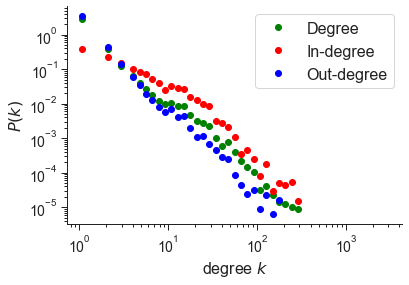

In [141]:
plotAll(w_NoLoops_G)

In [142]:
# # Write the dataframe to a CSV file
# df2.to_csv('w_noLoop_edges.csv', index=False)


In [31]:
wnl = pd.read_csv('w_noLoop_edges.csv')
wnl.drop(columns=['Id', 'Label', 'Community', 'Type', 'Timeset'], inplace = True)

def getWeaklyCC(df_read_csv_Name):
    # create MultiDiGraph from dataframe
    G = nx.from_pandas_edgelist(df_read_csv_Name, 'Source', 'Target', edge_attr=True, create_using=nx.DiGraph())

    # calculating largest strongly connected component 
    components = nx.weakly_connected_components(G)
    largest_component = max(components, key=len)
    SubG = G.subgraph(largest_component)
    return SubG


In [42]:
wcc_G = getWeaklyCC(wnl)
print("Total number of Nodes: ", wcc_G.number_of_nodes())
print("Total number of Edges: ", wcc_G.number_of_edges())


Total number of Nodes:  7126
Total number of Edges:  19786


In [6]:
# pip install powerlaw

In [9]:
df =pd.read_csv('wcc_edges.csv')
wcc_G = nx.from_pandas_edgelist(df, 'source', 'target', edge_attr=True, create_using=nx.DiGraph())

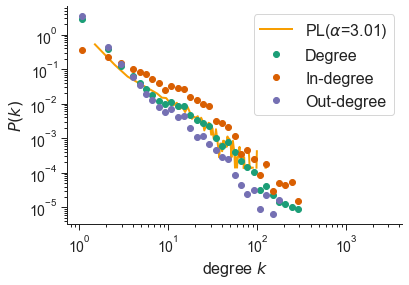

In [29]:
plotAll(wcc_G, a)

In [57]:
import powerlaw

def plotPowerLaw(G):
    degrees = [degree for node, degree in G.degree()]
    data = np.array(degrees)

    results = powerlaw.Fit(data)
    a = results.power_law.alpha
    print(results.power_law.xmin)
    R, p = results.distribution_compare('power_law', 'lognormal')
    print(R,p)
    
    return a, results

In [36]:
edges = wcc_G.edges(data=True)
edge_list = [(u, v, data['Weight']) for u, v, data in edges]

# Create a pandas dataframe from the edge list
df = pd.DataFrame(edge_list, columns=['Source', 'Target', 'Weight'])

# Write the dataframe to a CSV file
df.to_csv('wcc_edges.csv', index=False)

In [82]:
#This code is taken from previous group project from CPSC572 course. Written by Andrew Turong and Modifeid by Leinard Grande
# Function Defintions

# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_degree_dist(G, a):
    
    degrees = [G.degree(n) for n in G.nodes()]

    kmin = min(degrees)
    kmax = max(degrees)
   
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=50)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=50)
        
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none',  color='#41B3A3', label = 'Degree')
    
    
    fit = powerlaw.Fit(degrees, xmin=2)
    alpha = fit.power_law.alpha
    R, p = fit.distribution_compare('power_law', 'lognormal')
    print(R)
    # Plot power-law fit
    fit.power_law.plot_pdf(degrees,  color='#FC4445', linestyle='--', linewidth=2)

    
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # Add legend and labels
    plt.legend(labels=['Degree', 'PL($\\alpha$={:.2f})'.format(a)],  loc ="upper right")
    plt.show()


In [41]:
nodes = wcc_G.nodes()
# Create a pandas dataframe from the edge list
df = pd.DataFrame(nodes, columns=['Id'] )

# Write the dataframe to a CSV file
df.to_csv('wcc_nodes.csv', index=False)

In [9]:
# Degree Distribution of an Undirected graph:

df =pd.read_csv('wcc_edges.csv')
wcc_G = nx.from_pandas_edgelist(df, 'source', 'target', edge_attr=True, create_using=nx.Graph())

print("Total number of Nodes: ", wcc_G.number_of_nodes())
print("Total number of Edges: ", wcc_G.number_of_edges())

Total number of Nodes:  7126
Total number of Edges:  19743


In [68]:
a, r = plotPowerLaw(wcc_G)

Calculating best minimal value for power law fit
41.0
-0.05951684734660079 0.7950260277644574


-3.2428508833002967


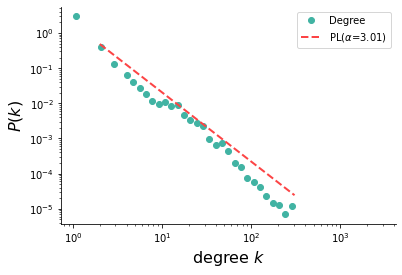

In [83]:
plot_degree_dist(wcc_G, a)